In [1]:
import pandas as pd
df = pd.read_csv("data/statistics.csv")
df = df[1:]
df


,query,question,answer,tag,tag_predict
1,Học viện có bao nhiêu loại học bổng?,Học viện có bao nhiêu loại học bổng,"Có 3 loại học bổng là: học bổng đặc biệt, học ...",học bổng,học bổng
2,Các trang web chính thức của học viện?,Các trang web chính thức của học viện?,Các trang web chính thức của học viện là:\n1. ...,học viện,học viện
3,Những ngành mới của học viện năm nay,Những ngành học mới trong học viện năm 2024?,Bạn muốn hỏi ngành mới của học viện ở cơ sở mi...,ngành đào tạo,ngành đào tạo
4,miền nam,Tôi muốn tìm hiểu các ngành ở cơ sở miền nam?,Tôi không hiểu câu hỏi của bạn. Vui lòng đặt c...,ngành đào tạo,chào hỏi
5,những ngành học mới trong học viện năm 2024 mi...,Ngành học mới trong học viện năm 2024 tại cơ s...,Cơ sở miền nam có đào tạo 2 ngành mới so với n...,ngành đào tạo,ngành đào tạo
...,...,...,...,...,...
125,tại sao trường lại được gọi là học viện hoàng gia,Tại sao học viện lại được gọi là học viện hoàn...,Vì học viện có cơ sở vật chất cũng như môi trư...,học viện,học viện
126,học viện thành lập năm nào,Học viện thành lập năm nào?,Học viện Công nghệ Bưu chính Viễn thông được t...,học viện,học viện
127,thông tin chung về học viện,Thông tin giảng viên của học viện?,Tôi không hiểu câu hỏi của bạn. Vui lòng đặt c...,học viện,tuyển sinh
128,trường có bao nhiêu cơ sở,Học viện có bao nhiêu cơ sở?,Học viện có 2 cơ sở là cơ sở miền bắc và cơ sở...,học viện,học viện


In [2]:
accuracy_df = df.groupby('tag').apply(
    lambda group: pd.Series({
        'total': len(group),
        'correct': (group['tag'] == group['tag_predict']).sum()
    })
).reset_index()

accuracy_df['accuracy (%)'] = (accuracy_df['correct'] / accuracy_df['total']) * 100


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


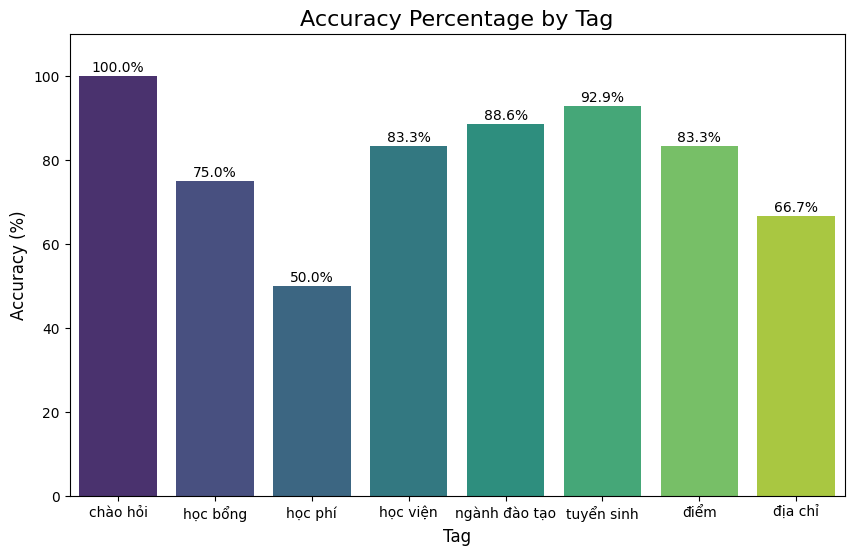

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='tag', y='accuracy (%)', palette='viridis')

for index, row in accuracy_df.iterrows():
    plt.text(index, row['accuracy (%)'] + 1, f"{row['accuracy (%)']:.1f}%", ha='center', fontsize=10)

plt.title('Accuracy Percentage by Tag', fontsize=16)
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 110)  
plt.show()


                                               query  count
0       Những ngành học mới trong học viện năm 2024?      5
1                                           miền nam      4
2               Học viện có bao nhiêu loại học bổng?      3
3  những ngành học mới trong học viện năm 2024 mi...      3
4  tại sao trường lại được gọi là học viện hoàng gia      3
5         Quy định, quy chế tuyển sinh của học viện?      3
6                                           miền bắc      2
7  Các mốc thời gian quan trọng trong việc tuyển ...      2
8            Quy trình nộp hồ sơ trực tuyến như nào?      2
9              Hồ sơ nhập học cần chuẩn bị những gì?      2


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


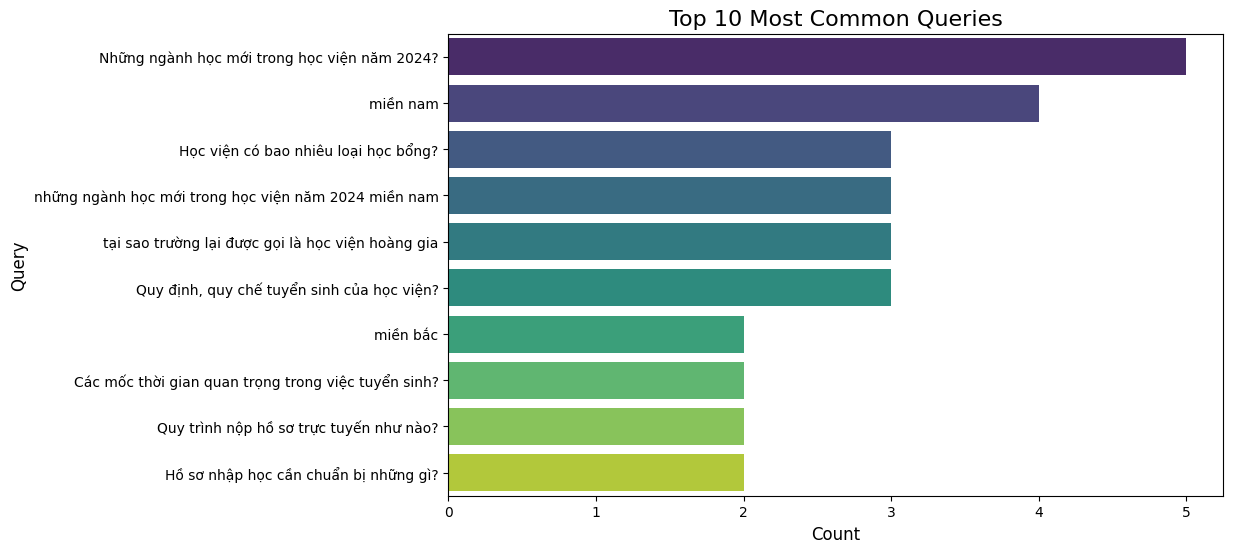

In [5]:
# Thống kê tần suất của các câu query
query_counts = df['query'].value_counts().head(10).reset_index()
query_counts.columns = ['query', 'count']
print(query_counts)
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=query_counts, y='query', x='count', palette='viridis')

# Cài đặt nhãn và tiêu đề
plt.title('Top 10 Most Common Queries', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Query', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


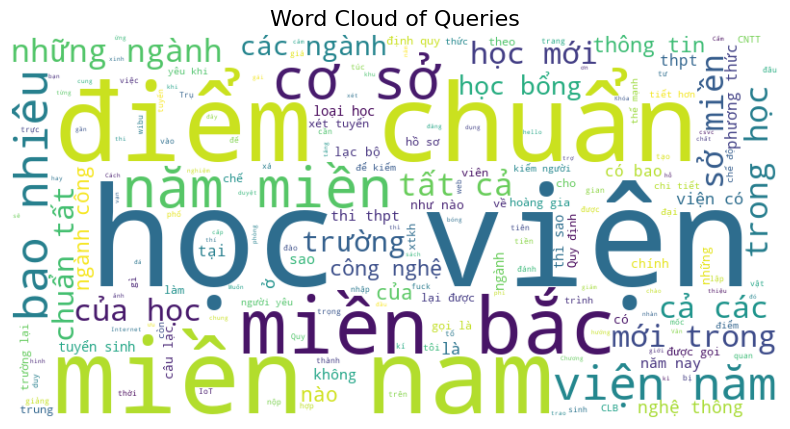

In [6]:
from wordcloud import WordCloud

# Tạo Word Cloud từ danh sách query
query_text = ' '.join(df['query'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(query_text)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Queries", fontsize=16)
plt.show()
